In [2]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import time
import sys
import string

In [88]:
import numpy as np

In [320]:
import lxml

In [4]:
import datetime

In [439]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
def html_stripper(text):
    return re.sub('<[^<]+?>', '', str(text))

In [6]:
data = "2017/01/11/"

In [7]:
from datetime import date, timedelta

d1 = date(2016, 5, 12)  # start date
d2 = date(2017, 5, 12)  # end date

delta = d2 - d1         # timedelta

datelist = [str(d1 + timedelta(days=x)) for x in range((d2-d1).days + 1)] #list of dates

#formating date to the suitable form
for i in range(delta.days + 1):
    datelist[i] = datelist[i].replace('-','/')

In [8]:
main_url = 'https://lenta.ru/rubrics/world/'

In [9]:
main_url + str(data)

'https://lenta.ru/rubrics/world/2017/01/11/'

In [10]:
requests.get(main_url + str(data))

<Response [200]>

In [11]:
news_page = requests.get(main_url + str(data))
news_page = news_page.content

In [12]:
news_page

b'<!DOCTYPE html><html><head>\n<title>\xd0\x9d\xd0\xbe\xd0\xb2\xd0\xbe\xd1\x81\xd1\x82\xd0\xb8: \xd0\x9c\xd0\xb8\xd1\x80: 11.01.2017: Lenta.ru</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type" />\n<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"66a8d51230","applicationID":"1241738","transactionName":"J19cQUoOWA0ERBoFQwdYW0NdTlYYA1paBw==","queueTime":0,"applicationTime":84,"agent":""}</script>\n<script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQUGU1VRGwICUFBVBAk="};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{c.console&&console.log(t)}catch(e){}}var o,

In [13]:
news_page = BeautifulSoup(news_page, 'lxml')

In [14]:
print(news_page.find('h3', attrs = {'class':""}))

<h3><a href="/columns/2017/01/11/soares_obituary/"><span>Человек перехода</span></a></h3>


In [15]:
ssylka = news_page.find('h3', attrs = {'class':""})
ssylka

<h3><a href="/columns/2017/01/11/soares_obituary/"><span>Человек перехода</span></a></h3>

In [16]:
str(ssylka)

'<h3><a href="/columns/2017/01/11/soares_obituary/"><span>Человек перехода</span></a></h3>'

In [17]:
re.sub('<[^<]+?>', '', str(ssylka))

'Человек перехода'

In [18]:
re.split('"', str(ssylka))[1]

'/columns/2017/01/11/soares_obituary/'

In [19]:
def html_stripper(text):
    return re.sub('<[^<]+?>', '', str(text)) # очень крутые регулярные выражения - убирают все скобочки, тэги и прочую ерунду

In [20]:
for newshead in news_page.findAll('h3', attrs = {'class':""}):
    print(re.split('"', str(newshead))[1])

/columns/2017/01/11/soares_obituary/
/news/2017/01/11/reactor_aes_belgia/
/news/2017/01/11/dilan_ruf_smertnaya_kazn/
/news/2017/01/11/synopsis/
/news/2017/01/11/reports/
/news/2017/01/11/trumpcomment/
/news/2017/01/11/obama/
/news/2017/01/11/tillerson_senate/
/news/2017/01/11/zasterlil_vooruzh_grab_mableton/
/news/2017/01/11/no_credibility/
/news/2017/01/11/ciafsbtalks/
/news/2017/01/11/ambassador_wounded/
/news/2017/01/11/against_assad/
/news/2017/01/11/migrants_quotas/
/news/2017/01/11/francepoliceradicalisation/
/news/2017/01/11/samsung_suspected/
/news/2017/01/11/italyimams/
/news/2017/01/11/trump_rating/
/news/2017/01/11/unicefstatistics/
/news/2017/01/11/canadamidchef/
/news/2017/01/11/no_nothing/
/news/2017/01/11/trump_nazi/
/news/2017/01/11/germanyrefugees/
/news/2017/01/11/spainparentsfraud/
/news/2017/01/11/breivik_half_million/
/news/2017/01/11/njet_molotoff/
/news/2017/01/11/robbers_china/
/news/2017/01/11/trump_putin/
/news/2017/01/11/clapper/
/news/2017/01/11/no_reset_tha

In [21]:

links_day = [str(main_url + data + re.split('"', str(newshead))[1]) for newshead in news_page.findAll('h3', attrs = {'class':""})]

In [22]:
days_list = [str(main_url + datelist[i]) for i in range(len(datelist))]

In [23]:
#collecting links for articles at one day
days_list[0]
news_page = requests.get(main_url + str(data))
news_page = news_page.content

In [24]:
#collecting links for articles at one day
days_list[0]
news_page = requests.get(main_url + str(data))
news_page = news_page.content

In [25]:
news_url = 'https://lenta.ru'

In [26]:
# Collecting links for all articles in one list of lists
links_day = []
all_links = []
for i in range(len(days_list)):
    
    news_page_c = requests.get(days_list[i])
    news_page_c = news_page_c.content
    news_page_c = BeautifulSoup(news_page_c, 'lxml')
    links_day = [str(news_url + re.split('"', str(newshead))[1]) for newshead in news_page_c.findAll('h3', attrs = {'class':""})]
    all_links.append(links_day)

In [27]:
links_day

['https://lenta.ru/articles/2017/05/12/whowillbenext/',
 'https://lenta.ru/news/2017/05/12/trump/',
 'https://lenta.ru/news/2017/05/12/lavrov/',
 'https://lenta.ru/news/2017/05/12/letsmakepeace/',
 'https://lenta.ru/news/2017/05/12/trumplavrov/',
 'https://lenta.ru/news/2017/05/12/airforceone/',
 'https://lenta.ru/news/2017/05/12/korea/',
 'https://lenta.ru/news/2017/05/12/istanbul_borsa/',
 'https://lenta.ru/news/2017/05/12/14_years_at_home/',
 'https://lenta.ru/news/2017/05/12/isis_australia/',
 'https://lenta.ru/news/2017/05/12/three_gulenists/',
 'https://lenta.ru/news/2017/05/12/biochemical_weapon/',
 'https://lenta.ru/news/2017/05/12/barcelona/',
 'https://lenta.ru/news/2017/05/12/poland/',
 'https://lenta.ru/news/2017/05/12/austria_bank/',
 'https://lenta.ru/news/2017/05/12/two_explosions/',
 'https://lenta.ru/news/2017/05/12/fireball/',
 'https://lenta.ru/news/2017/05/12/los_zetas/',
 'https://lenta.ru/news/2017/05/12/rome/',
 'https://lenta.ru/news/2017/05/12/qaeda/',
 'https:

In [28]:
days_list

['https://lenta.ru/rubrics/world/2016/05/12',
 'https://lenta.ru/rubrics/world/2016/05/13',
 'https://lenta.ru/rubrics/world/2016/05/14',
 'https://lenta.ru/rubrics/world/2016/05/15',
 'https://lenta.ru/rubrics/world/2016/05/16',
 'https://lenta.ru/rubrics/world/2016/05/17',
 'https://lenta.ru/rubrics/world/2016/05/18',
 'https://lenta.ru/rubrics/world/2016/05/19',
 'https://lenta.ru/rubrics/world/2016/05/20',
 'https://lenta.ru/rubrics/world/2016/05/21',
 'https://lenta.ru/rubrics/world/2016/05/22',
 'https://lenta.ru/rubrics/world/2016/05/23',
 'https://lenta.ru/rubrics/world/2016/05/24',
 'https://lenta.ru/rubrics/world/2016/05/25',
 'https://lenta.ru/rubrics/world/2016/05/26',
 'https://lenta.ru/rubrics/world/2016/05/27',
 'https://lenta.ru/rubrics/world/2016/05/28',
 'https://lenta.ru/rubrics/world/2016/05/29',
 'https://lenta.ru/rubrics/world/2016/05/30',
 'https://lenta.ru/rubrics/world/2016/05/31',
 'https://lenta.ru/rubrics/world/2016/06/01',
 'https://lenta.ru/rubrics/world/2

In [33]:
#creating one final list of links
final_links = []
for i in range(len(all_links)):
    for j in range(len(all_links[i])):
        final_links.append(all_links[i][j])

In [34]:
#number of collected articles in "World" section
len(final_links)

10196

## Let's now get the text out of one particular article 

In [35]:
article_page = requests.get(final_links[0])
article_page = article_page.content
article_page = BeautifulSoup(article_page, 'lxml')

In [36]:
doc_text = article_page.find('div', attrs = {'class':'b-text clearfix js-topic__text'}) #Getting the article text as one string
doc_text = re.sub('<[^<]+?>', '', str(doc_text)) #removing all hashes, html features, etc
doc_text = re.sub('['+string.punctuation+'—'+'«»'']', '', str(doc_text)) #removing punctuation

In [37]:
doc_text_pd = pd.Series(re.split(' ', doc_text)).str.lower()

In [38]:
pd.DataFrame(doc_text_pd.value_counts()).transpose()

в  по  на  тысяч  помощь  превратилась  исчезли  погибли  и  обрушилось  \
0  5   2   2      2       1             1        1        1  1           1   

       ...        приходится  2015  долларов  непальским  около  обеспечить  \
0      ...                 1     1         1           1      1           1   

   хватило  одночасье  года  туристический  
0        1          1     1              1  

[1 rows x 72 columns]

In [39]:
def getTextForm(articlelink):
    article_page = requests.get(articlelink)
    
    article_page = article_page.content
    article_page = BeautifulSoup(article_page, 'lxml')
    
    doc_text = article_page.find('div', attrs = {'class':'b-text clearfix js-topic__text'}) #Getting the text as one string
    doc_text = re.sub('<[^<]+?>', ' ', str(doc_text)) #removing all hashes, html features, etc
    doc_text = re.sub('['+string.punctuation+'—'+'«»'']', '', str(doc_text)) #removing punctuation
    return doc_text

In [40]:
def getTextRaw(articlelink):
    article_page = requests.get(articlelink)
    
    article_page = article_page.content
    article_page = BeautifulSoup(article_page, 'lxml')
    
    doc_text = article_page.find('div', attrs = {'class':'b-text clearfix js-topic__text'}) #Getting the text as one string
    doc_text = re.sub('<[^<]+?>', ' ', str(doc_text)) #removing all hashes, html features, etc
    return doc_text

In [41]:
def getWords(doc_text): 
    doc_text_pd = pd.Series(re.split(' ', doc_text)).str.lower()
    return(pd.DataFrame(doc_text_pd.value_counts()).transpose())
    
    

In [42]:
getWords(getTextForm(final_links[1]))

в  что  2015  планирования  признал  семьи  стрельбу  диар  года ...   \
0  17  11    3     3             2        2      2         2     2     2 ...    

   выступает  лечения  на  роберта  вот  психиатрической  порядка  убийство  \
0          1        1   1        1    1                1        1         1   

   приостановил  сам  
0             1    1  

[1 rows x 100 columns]

In [43]:
def GetArticle(articlelink):
    
    #getting text 
    
    article_page = requests.get(articlelink)
    
    article_page = article_page.content
    article_page = BeautifulSoup(article_page, 'lxml')
    
    doc_text = article_page.find('div', attrs = {'class':'b-text clearfix js-topic__text'}) #Getting the text as one string
    doc_text = re.sub('<[^<]+?>', ' ', str(doc_text)) #removing all hashes, html features, etc
    doc_text = re.sub('['+string.punctuation+'—'+'«»'']', '', str(doc_text)) #removing punctuation
    
    
    #creating a single dataframe
    doc_text_pd = pd.Series(re.split(' ', doc_text)).str.lower()
    
    return(pd.DataFrame(doc_text_pd.value_counts()).transpose())
   
    

In [44]:
def EssCont(doc_text):
    numcon = len(re.split('    ', str(doc_text)))
    if numcon <= 4:
        return doc_text
    elif numcon >4 and numcon <=10:
        listtext = re.split('    ', str(doc_text))
        del listtext [1:5]
        doc_text = str(listtext)
        return doc_text
    else:
        listtext = re.split('    ', str(doc_text))
        del listtext [1:9]
        doc_text = str(listtext)
        return doc_text

In [45]:
art1 = GetArticle(final_links[0])
art2 = GetArticle(final_links[1])
art2

в  что  2015  планирования  признал  семьи  стрельбу  диар  года ...   \
0  17  11    3     3             2        2      2         2     2     2 ...    

   выступает  лечения  на  роберта  вот  психиатрической  порядка  убийство  \
0          1        1   1        1    1                1        1         1   

   приостановил  сам  
0             1    1  

[1 rows x 100 columns]

In [46]:
art2 = pd.merge(art1, art2, 'outer')

In [47]:
art2


в   по   на  тысяч  обрушилось  исчезли  погибли    и  помощь  \
0   5.0   5.0  2.0  2.0    2.0         1.0      1.0      1.0  1.0     1.0   
1  17.0  11.0  1.0  1.0    NaN         NaN      NaN      NaN  1.0     NaN   

  ...   еще  выступает  лечения  роберта  вот  психиатрической  порядка  \
0 ...   NaN        NaN      NaN      NaN  NaN              NaN      NaN   
1 ...   1.0        1.0      1.0      1.0  1.0              1.0      1.0   

   убийство  приостановил  сам  
0       NaN           NaN  NaN  
1       1.0           1.0  1.0  

[2 rows x 161 columns]

In [48]:
def getDay(date):
    news_page_c = requests.get(str(main_url + date))
    news_page_c = news_page_c.content
    news_page_c = BeautifulSoup(news_page_c, 'lxml')
    links_day = [str(news_url + re.split('"', str(newshead))[1]) for newshead in news_page_c.findAll('h3', attrs = {'class':""})]
    return(links_day)

In [49]:
# Collecting all news from one day

In [50]:
def getDayNews(date):
    listlinks = getDay(date)
    words = GetArticle(listlinks[0])
    for i in range(1,len(listlinks)):
        try:
            words = pd.merge(words, GetArticle(listlinks[i]), 'outer')   
        except:
            print('Something wrong with ' + str(listlinks[i]))
    words = words.fillna(0)
    words = pd.DataFrame(words.sum(0)).transpose()
    return words
    
   

In [51]:
# Collecting all news for all days

In [60]:
def GetFinal(dates):
    final = getDayNews(dates[0])
    for i in range(1, len(dates)):
        try:
            final = pd.merge(final, getDayNews(dates[i]), 'outer')
            print('I am working on ' + str(dates[i]))
        except:
            print('Something wrong with ' + str(dates[i]))
    final = final.fillna(0)
    return final

In [61]:
len(datelist)

366

In [64]:
LentaWorld = GetFinal(datelist)

I am working on 2016/05/13
I am working on 2016/05/14
I am working on 2016/05/15
I am working on 2016/05/16
I am working on 2016/05/17
I am working on 2016/05/18
I am working on 2016/05/19
I am working on 2016/05/20
I am working on 2016/05/21
I am working on 2016/05/22
I am working on 2016/05/23
I am working on 2016/05/24
I am working on 2016/05/25
I am working on 2016/05/26
I am working on 2016/05/27
I am working on 2016/05/28
I am working on 2016/05/29
I am working on 2016/05/30
I am working on 2016/05/31
I am working on 2016/06/01
I am working on 2016/06/02
I am working on 2016/06/03
I am working on 2016/06/04
I am working on 2016/06/05
I am working on 2016/06/06
I am working on 2016/06/07
I am working on 2016/06/08
I am working on 2016/06/09
I am working on 2016/06/10
I am working on 2016/06/11
I am working on 2016/06/12
I am working on 2016/06/13
I am working on 2016/06/14
I am working on 2016/06/15
I am working on 2016/06/16
I am working on 2016/06/17
I am working on 2016/06/18
I

In [245]:
LentaWorld

в     по     на  тысяч  обрушилось  исчезли  погибли      и  помощь  \
0    379.0   96.0  136.0    8.0         1.0      1.0      4.0  203.0     2.0   
1    370.0  101.0  132.0    7.0         0.0      0.0      9.0  159.0     0.0   
2    117.0   34.0   37.0    1.0         0.0      1.0      0.0   34.0     0.0   
3     99.0   22.0   29.0    2.0         0.0      0.0      1.0   40.0     0.0   
4    317.0   74.0   84.0   11.0         0.0      0.0      2.0  147.0     1.0   
5    311.0   79.0  113.0    2.0         0.0      0.0      3.0  149.0     0.0   
6    358.0   76.0  107.0    9.0         0.0      0.0      5.0  216.0     0.0   
7    441.0  107.0  165.0   17.0         0.0      0.0      3.0  188.0     0.0   
8    387.0   89.0  132.0    7.0         0.0      0.0      5.0  218.0     0.0   
9    193.0   49.0   80.0    2.0         0.0      0.0      3.0   87.0     0.0   
10   187.0   34.0   57.0    3.0         0.0      0.0      7.0   61.0     0.0   
11   284.0   79.0  127.0    9.0         0.0      0.0      4.0  121.0     1.0   
12   277.0   83.0  111.0    4.0         0.0      0.0      4.0  161.0     2.0   
13   425.0  113.0  152.0    3.0         0.0      0.0      1.0  195.0     1.0   
14   361.0   98.0  117.0   10.0         0.0      0.0      2.0  178.0     3.0   
15   327.0   68.0   91.0   10.0         0.0      0.0      3.0  171.0     0.0   
16   155.0   31.0   43.0    3.0         0.0      1.0      0.0  100.0     1.0   
17    95.0   32.0   28.0    0.0         0.0      0.0      2.0   32.0     0.0   
18   324.0   78.0  116.0    4.0         0.0      0.0      4.0  179.0     1.0   
19   262.0   78.0   97.0    3.0         0.0      0.0      4.0  132.0     0.0   
20   318.0   72.0   99.0    8.0         0.0      0.0      3.0  147.0     2.0   
21   409.0  112.0  109.0   10.0         0.0      0.0     11.0  202.0     0.0   
22   402.0   94.0  116.0    7.0         0.0      0.0      7.0  164.0     0.0   
23   152.0   32.0   43.0    5.0         0.0      0.0      6.0   62.0     2.0   
24   138.0   42.0   54.0    5.0         0.0      0.0      2.0   59.0     2.0   
25   365.0   82.0  146.0   10.0         0.0      1.0      9.0  187.0     1.0   
26   357.0   84.0  158.0    6.0         0.0      0.0      8.0  188.0     1.0   
27   434.0   95.0  129.0    7.0         0.0      0.0      6.0  161.0     0.0   
28   335.0   92.0  106.0   10.0         0.0      0.0      9.0  181.0     1.0   
29   255.0   60.0   88.0    4.0         0.0      0.0      1.0  131.0     1.0   
..     ...    ...    ...    ...         ...      ...      ...    ...     ...   
336  370.0  188.0  168.0    5.0         0.0      0.0     20.0  193.0     2.0   
337  396.0  138.0  135.0    7.0         0.0      0.0      5.0  194.0     3.0   
338  149.0   51.0   50.0    1.0         0.0      0.0      2.0   57.0     0.0   
339  191.0   68.0   44.0    7.0         0.0      0.0      4.0   73.0     0.0   
340  369.0  145.0  161.0    2.0         0.0      0.0      8.0  223.0     1.0   
341  325.0  107.0   98.0    5.0         0.0      0.0     15.0  120.0     0.0   
342  291.0   96.0  122.0    6.0         0.0      0.0     10.0  125.0     5.0   
343  284.0  103.0   96.0    7.0         0.0      0.0      7.0  134.0     1.0   
344  355.0   94.0  151.0    3.0         0.0      0.0      4.0  188.0     0.0   
345  165.0   47.0   63.0    2.0         0.0      0.0      2.0  111.0     0.0   
346  190.0   63.0   70.0    2.0         0.0      0.0      1.0   95.0     2.0   
347  305.0   87.0  105.0   10.0         0.0      0.0      7.0  125.0     0.0   
348  250.0   63.0   81.0    4.0         0.0      0.0      7.0  111.0     3.0   
349  315.0   85.0  100.0    6.0         0.0      0.0     10.0  173.0     2.0   
350  373.0  120.0  159.0    8.0         0.0      0.0      6.0  169.0     1.0   
351  364.0  139.0  142.0    7.0         0.0      0.0      7.0  201.0     0.0   
352  171.0   42.0   63.0    4.0         0.0      0.0      3.0   67.0     0.0   
353  148.0   35.0   39.0    0.0         0.0      0.0      4.0   51.0     1.0   
354  183.

In [80]:
LentaWorld.to_csv('D:/WorK Hard/ICEF/LentaWorld.csv')

In [240]:
LentaWorld = pd.read_csv('D:/WorK Hard/ICEF/LentaWorld.csv', encoding = 'cp1251')

In [246]:
LentaWorld['Date'] = pd.Series(datelist)

In [247]:
LentaWorld.set_index('Date')

в     по     на  тысяч  обрушилось  исчезли  погибли      и  \
Date                                                                          
2016/05/12  379.0   96.0  136.0    8.0         1.0      1.0      4.0  203.0   
2016/05/13  370.0  101.0  132.0    7.0         0.0      0.0      9.0  159.0   
2016/05/14  117.0   34.0   37.0    1.0         0.0      1.0      0.0   34.0   
2016/05/15   99.0   22.0   29.0    2.0         0.0      0.0      1.0   40.0   
2016/05/16  317.0   74.0   84.0   11.0         0.0      0.0      2.0  147.0   
2016/05/17  311.0   79.0  113.0    2.0         0.0      0.0      3.0  149.0   
2016/05/18  358.0   76.0  107.0    9.0         0.0      0.0      5.0  216.0   
2016/05/19  441.0  107.0  165.0   17.0         0.0      0.0      3.0  188.0   
2016/05/20  387.0   89.0  132.0    7.0         0.0      0.0      5.0  218.0   
2016/05/21  193.0   49.0   80.0    2.0         0.0      0.0      3.0   87.0   
2016/05/22  187.0   34.0   57.0    3.0         0.0      0.0      7.0   61.0   
2016/05/23  284.0   79.0  127.0    9.0         0.0      0.0      4.0  121.0   
2016/05/24  277.0   83.0  111.0    4.0         0.0      0.0      4.0  161.0   
2016/05/25  425.0  113.0  152.0    3.0         0.0      0.0      1.0  195.0   
2016/05/26  361.0   98.0  117.0   10.0         0.0      0.0      2.0  178.0   
2016/05/27  327.0   68.0   91.0   10.0         0.0      0.0      3.0  171.0   
2016/05/28  155.0   31.0   43.0    3.0         0.0      1.0      0.0  100.0   
2016/05/29   95.0   32.0   28.0    0.0         0.0      0.0      2.0   32.0   
2016/05/30  324.0   78.0  116.0    4.0         0.0      0.0      4.0  179.0   
2016/05/31  262.0   78.0   97.0    3.0         0.0      0.0      4.0  132.0   
2016/06/01  318.0   72.0   99.0    8.0         0.0      0.0      3.0  147.0   
2016/06/02  409.0  112.0  109.0   10.0         0.0      0.0     11.0  202.0   
2016/06/03  402.0   94.0  116.0    7.0         0.0      0.0      7.0  164.0   
2016/06/04  152.0   32.0   43.0    5.0         0.0      0.0      6.0   62.0   
2016/06/05  138.0   42.0   54.0    5.0         0.0      0.0      2.0   59.0   
2016/06/06  365.0   82.0  146.0   10.0         0.0      1.0      9.0  187.0   
2016/06/07  357.0   84.0  158.0    6.0         0.0      0.0      8.0  188.0   
2016/06/08  434.0   95.0  129.0    7.0         0.0      0.0      6.0  161.0   
2016/06/09  335.0   92.0  106.0   10.0         0.0      0.0      9.0  181.0   
2016/06/10  255.0   60.0   88.0    4.0         0.0      0.0      1.0  131.0   
...           ...    ...    ...    ...         ...      ...      ...    ...   
2017/04/13  370.0  188.0  168.0    5.0         0.0      0.0     20.0  193.0   
2017/04/14  396.0  138.0  135.0    7.0         0.0      0.0      5.0  194.0   
2017/04/15  149.0   51.0   50.0    1.0         0.0      0.0      2.0   57.0   
2017/04/16  191.0   68.0   44.0    7.0         0.0      0.0      4.0   73.0   
2017/04/17  369.0  145.0  161.0    2.0         0.0      0.0      8.0  223.0   
2017/04/18  325.0  107.0   98.0    5.0         0.0      0.0     15.0  120.0   
2017/04/19  291.0   96.0  122.0    6.0         0.0      0.0     10.0  125.0   
2017/04/20  284.0  103.0   96.0    7.0         0.0      0.0      7.0  134.0   
2017/04/21  355.0   94.0  151.0    3.0         0.0      0.0      4.0  188.0   
2017/04/22  165.0   47.0   63.0    2.0         0.0      0.0      2.0  111.0   
2017/04/23  190.0   63.0   70.0    2.0         0.0      0.0      1.0   95.0   
2017/04/24  305.0   87.0  105.0   10.0         0.0      0.0      7.0  125.0   
2017/04/25  250.0   63.0   81.0    4.0         0.0      0.0      7.0  111.0   
2017/04/26  315.0   85.0  100.0    6.0         0.0      0.0     10.0  173.0   
2017/04/27  373.0  120.0  159.0    8.0         0.0      0.0      6.0  169.0   
2017/04/28  364.0  139.0  142.0    7.0         0.0      0.0      7.0  201.0   
2017/04/29  171.0   42.0   63.0    4.0         0.0      0.0      3.0   67.0   
2017/04/30  148.0   35.0   39.0    0.0         0.0      0.0      4

In [244]:
LentaWorld.drop(LentaWorld.columns[0], axis=1, inplace=True)

In [100]:
LentaWorldmatr = np.array(LentaWorld)

In [93]:
np.count_nonzero(LentaWorldmatr)

In [140]:
np.count_nonzero(LentaWorldmatr[:,112344])

2

Let's remove words that occur too often (>90% days) or too rare (<5% days)

In [161]:
366*90/100 

329.4

In [144]:
366*5/100 #rare words benchmark

18.3

In [178]:
LentaWorldSR.columns[2]

'на'

In [252]:
np.count_nonzero(matrixofwords[:,117114])

1

In [157]:
117116 #Number of columns

117116

In [253]:
Listofcol = []
for i in range(117114):
    counts = np.count_nonzero(matrixofwords[:,i])
    if (counts > 329) or (counts < 18):
        Listofcol.append(LentaWorld.columns[i])
        print ('Word added ' + LentaWorld.columns[i])
    

Word added в
Word added по
Word added на
Word added тысяч
Word added обрушилось
Word added погибли
Word added и
Word added меркам
Word added переживающая
Word added непал
Word added катманду
Word added маленькую
Word added том
Word added непалу
Word added непальцев
Word added руины
Word added туристический
Word added то
Word added страшное
Word added но
Word added человек
Word added крова
Word added бум
Word added собирали
Word added были
Word added этой
Word added выживать
Word added громадной
Word added жильем
Word added карманах
Word added 2015
Word added гималаях
Word added непальским
Word added около
Word added хватило
Word added одночасье
Word added года
Word added чтобы
Word added что
Word added диар
Word added психологам
Word added реабилитации
Word added сша
Word added неприятием
Word added результате
Word added повышенных
Word added медицинском
Word added диара
Word added спрингс
Word added мартинес
Word added колорадоспрингс
Word added невменяемым
Word added тонах
Word added

In [254]:
len(Listofcol)

106029

In [255]:
LentaWorldSR = LentaWorld.drop(Listofcol, axis = 1)

In [333]:
LentaWorldSR = LentaWorldSR.set_index('Date')

In [259]:
LentaWorldSR.to_csv('D:/WorK Hard/ICEF/LentaWorldStopRare.csv')

In [258]:
import sklearn

In [361]:
usdrub = pd.read_csv('D:/WorK Hard/ICEF/USD.csv')

In [362]:
usdrub

TICKER        DATE  OPEN  HIGH  LOW    CLOSE  VOL  WAPRICE  NOMINAL
0      USD  2016-05-12   NaN   NaN  NaN  66.2428  NaN      NaN        1
1      USD  2016-05-13   NaN   NaN  NaN  64.9607  NaN      NaN        1
2      USD  2016-05-14   NaN   NaN  NaN  64.9306  NaN      NaN        1
3      USD  2016-05-17   NaN   NaN  NaN  64.8895  NaN      NaN        1
4      USD  2016-05-18   NaN   NaN  NaN  64.5138  NaN      NaN        1
5      USD  2016-05-19   NaN   NaN  NaN  65.0641  NaN      NaN        1
6      USD  2016-05-20   NaN   NaN  NaN  66.2110  NaN      NaN        1
7      USD  2016-05-21   NaN   NaN  NaN  66.3775  NaN      NaN        1
8      USD  2016-05-24   NaN   NaN  NaN  67.0475  NaN      NaN        1
9      USD  2016-05-25   NaN   NaN  NaN  67.0493  NaN      NaN        1
10     USD  2016-05-26   NaN   NaN  NaN  65.8949  NaN      NaN        1
11     USD  2016-05-27   NaN   NaN  NaN  65.2062  NaN      NaN        1
12     USD  2016-05-28   NaN   NaN  NaN  66.0413  NaN      NaN        1
13     USD  2016-05-31   NaN   NaN  NaN  66.0825  NaN      NaN        1
14     USD  2016-06-01   NaN   NaN  NaN  65.9962  NaN      NaN        1
15     USD  2016-06-02   NaN   NaN  NaN  66.6156  NaN      NaN        1
16     USD  2016-06-03   NaN   NaN  NaN  66.7491  NaN      NaN        1
17     USD  2016-06-04   NaN   NaN  NaN  66.8529  NaN      NaN        1
18     USD  2016-06-07   NaN   NaN  NaN  65.7894  NaN      NaN        1
19     USD  2016-06-08   NaN   NaN  NaN  65.2089  NaN      NaN        1
20     USD  2016-06-09   NaN   NaN  NaN  64.6797  NaN      NaN        1
21     USD  2016-06-10   NaN   NaN  NaN  63.7402  NaN      NaN        1
22     USD  2016-06-11   NaN   NaN  NaN  64.7077  NaN      NaN        1
23     USD  2016-06-14   NaN   NaN  NaN  64.7077  NaN      NaN        1
24     USD  2016-06-15   NaN   NaN  NaN  66.0306  NaN      NaN        1
25     USD  2016-06-16   NaN   NaN  NaN  65.9156  NaN      NaN        1
26     USD  2016-06-17   NaN   NaN  NaN  65.8618  NaN      NaN        1
27     USD  2016-06-18   NaN   NaN  NaN  65.4398  NaN      NaN        1
28     USD  2016-06-21   NaN   NaN  NaN  64.1509  NaN      NaN        1
29     USD  2016-06-22   NaN   NaN  NaN  64.1743  NaN      NaN        1
..     ...         ...   ...   ...  ...      ...  ...      ...      ...
223    USD  2017-03-30   NaN   NaN  NaN  57.0241  NaN      NaN        1
224    USD  2017-03-31   NaN   NaN  NaN  56.3779  NaN      NaN        1
225    USD  2017-04-01   NaN   NaN  NaN  55.9606  NaN      NaN        1
226    USD  2017-04-04   NaN   NaN  NaN  56.1396  NaN      NaN        1
227    USD  2017-04-05   NaN   NaN  NaN  56.5553  NaN      NaN        1
228    USD  2017-04-06   NaN   NaN  NaN  55.8940  NaN      NaN        1
229    USD  2017-04-07   NaN   NaN  NaN  56.4369  NaN      NaN        1
230    USD  2017-04-08   NaN   NaN  NaN  56.9201  NaN      NaN        1
231    USD  2017-04-11   NaN   NaN  NaN  57.3896  NaN      NaN        1
232    USD  2017-04-12   NaN   NaN  NaN  56.9552  NaN      NaN        1
233    USD  2017-04-13   NaN   NaN  NaN  56.7556  NaN      NaN        1
234    USD  2017-04-14   NaN   NaN  NaN  56.6019  NaN      NaN        1
235    USD  2017-04-15   NaN   NaN  NaN  56.2945  NaN      NaN        1
236    USD  2017-04-18   NaN   NaN  NaN  56.2505  NaN      NaN        1
237    USD  2017-04-19   NaN   NaN  NaN  55.9793  NaN      NaN        1
238    USD  2017-04-20   NaN   NaN  NaN  56.1753  NaN      NaN        1
239    USD  2017-04-21   NaN   NaN  NaN  56.4165  NaN      NaN        1
240    USD  2017-04-22   NaN   NaN  NaN  56.2307  NaN      NaN        1
241    USD  2017-04-25   NaN   NaN  NaN  56.0794  NaN      NaN        1
242    USD  2017-04-26   NaN   NaN  NaN  55.8453  NaN      NaN        1
243    USD  2017-04-27   NaN   NaN  NaN  56.3131  NaN      NaN        1
244    USD  2017-04-28   NaN   NaN  NaN  56.9707  NaN      NaN        1
245    USD  2017-04-29   NaN   NaN  NaN  56.9838  NaN      NaN        1
246    USD  2017-05-03   NaN   NaN  NaN  56.

In [363]:
datesusd = usdrub['DATE']

In [364]:
for i in range(253):
    datesusd[i] = datetime.datetime.strptime(datesusd[i], '%Y-%m-%d').strftime('%Y/%m/%d')

C:\Users\Олег\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [366]:
usdrub = usdrub['CLOSE']

In [367]:
usdrubbin = []

In [368]:
for i in range(252):
    if usdrub[i+1] > usdrub[i]:
        usdrubbin.append(1)
    else:
        usdrubbin.append(0)

In [369]:
usdrubbin = pd.DataFrame(usdrubbin, columns=['USDRUB'],  index=datesusd[:252])

In [370]:
usdrubbin

USDRUB
DATE              
2016/05/12       0
2016/05/13       0
2016/05/14       0
2016/05/17       0
2016/05/18       1
2016/05/19       1
2016/05/20       1
2016/05/21       1
2016/05/24       1
2016/05/25       0
2016/05/26       0
2016/05/27       1
2016/05/28       1
2016/05/31       0
2016/06/01       1
2016/06/02       1
2016/06/03       1
2016/06/04       0
2016/06/07       0
2016/06/08       0
2016/06/09       0
2016/06/10       1
2016/06/11       0
2016/06/14       1
2016/06/15       0
2016/06/16       0
2016/06/17       0
2016/06/18       0
2016/06/21       1
2016/06/22       0
...            ...
2017/03/29       1
2017/03/30       0
2017/03/31       0
2017/04/01       1
2017/04/04       1
2017/04/05       0
2017/04/06       1
2017/04/07       1
2017/04/08       1
2017/04/11       0
2017/04/12       0
2017/04/13       0
2017/04/14       0
2017/04/15       0
2017/04/18       0
2017/04/19       1
2017/04/20       1
2017/04/21       0
2017/04/22       0
2017/04/25       0
2017/04/26       1
2017/04/27       1
2017/04/28       1
2017/04/29       0
2017/05/03       1
2017/05/04       1
2017/05/05       1
2017/05/06       0
2017/05/11       0
2017/05/12       1

[252 rows x 1 columns]

In [371]:
LentaWorldSR = LentaWorldSR.join(usdrubbin, how = 'left')

In [372]:
LentaWorldSR = LentaWorldSR.fillna(method='ffill')

In [474]:
LentaWorldSR

исчезли  помощь  страна  людям  дипломаты  апреля  превратилась  \
Date                                                                          
2016/05/12      1.0     2.0     5.0    1.0        2.0    20.0           1.0   
2016/05/13      0.0     0.0     1.0    0.0        0.0    10.0           0.0   
2016/05/14      1.0     0.0     1.0    0.0        0.0     4.0           0.0   
2016/05/15      0.0     0.0     0.0    0.0        1.0     3.0           0.0   
2016/05/16      0.0     1.0     2.0    0.0        0.0     7.0           0.0   
2016/05/17      0.0     0.0     1.0    1.0        0.0     3.0           0.0   
2016/05/18      0.0     0.0     0.0    0.0        0.0    13.0           0.0   
2016/05/19      0.0     0.0     3.0    0.0        0.0     5.0           0.0   
2016/05/20      0.0     0.0     1.0    0.0        0.0    14.0           0.0   
2016/05/21      0.0     0.0     0.0    0.0        0.0     2.0           0.0   
2016/05/22      0.0     0.0     1.0    0.0        0.0     3.0           0.0   
2016/05/23      0.0     1.0     0.0    0.0        0.0     8.0           0.0   
2016/05/24      0.0     2.0     0.0    0.0        0.0     2.0           0.0   
2016/05/25      0.0     1.0     4.0    0.0        1.0     3.0           0.0   
2016/05/26      0.0     3.0     2.0    0.0        1.0     7.0           0.0   
2016/05/27      0.0     0.0     2.0    1.0        0.0    11.0           1.0   
2016/05/28      1.0     1.0     1.0    0.0        0.0     2.0           0.0   
2016/05/29      0.0     0.0     0.0    1.0        1.0     2.0           0.0   
2016/05/30      0.0     1.0     0.0    1.0        1.0     9.0           0.0   
2016/05/31      0.0     0.0     0.0    0.0        2.0     7.0           0.0   
2016/06/01      0.0     2.0     1.0    0.0        0.0     8.0           0.0   
2016/06/02      0.0     0.0     3.0    0.0        0.0     8.0           0.0   
2016/06/03      0.0     0.0     0.0    1.0        0.0     5.0           1.0   
2016/06/04      0.0     2.0     0.0    0.0        0.0     0.0           0.0   
2016/06/05      0.0     2.0     0.0    1.0        0.0     1.0           0.0   
2016/06/06      1.0     1.0     1.0    0.0        0.0     8.0           1.0   
2016/06/07      0.0     1.0     2.0    0.0        0.0     6.0           0.0   
2016/06/08      0.0     0.0     1.0    0.0        0.0     5.0           0.0   
2016/06/09      0.0     1.0     1.0    0.0        0.0     4.0           0.0   
2016/06/10      0.0     1.0     2.0    0.0        1.0     5.0           0.0   
...             ...     ...     ...    ...        ...     ...           ...   
2017/04/13      0.0     2.0     5.0    1.0        1.0    89.0           0.0   
2017/04/14      0.0     3.0     2.0    0.0        0.0    50.0           0.0   
2017/04/15      0.0     0.0     0.0    0.0        0.0    24.0           0.0   
2017/04/16      0.0     0.0     1.0    0.0        0.0    42.0           0.0   
2017/04/17      0.0     1.0     0.0    0.0        0.0    65.0           0.0   
2017/04/18      0.0     0.0     3.0    1.0        0.0    58.0           0.0   
2017/04/19      0.0     5.0     3.0    1.0        1.0    37.0           0.0   
2017/04/20      0.0     1.0     2.0    0.0        0.0    39.0           0.0   
2017/04/21      0.0     0.0     5.0    0.0        0.0    48.0           0.0   
2017/04/22      0.0     0.0     1.0    0.0        0.0    24.0           0.0   
2017/04/23      0.0     2.0     0.0    1.0        0.0    40.0           0.0   
2017/04/24      0.0     0.0     2.0    0.0        1.0    48.0           0.0   
2017/04/25      0.0     3.0     1.0    0.0        0.0    25.0           0.0   
2017/04/26      0.0     2.0     3.0    0.0        1.0    45.0           0.0   
2017/04/27      0.0     1.0     3.0    0.0        0.0    43.0           0.0   
2017/04/28      0.0     0.0     3.0    0.0        1.0    55.0           1.0   
2017/04/29      0.0     0.0     1.0    0.0        0.0    24.0           0.0   
2017/04/30      0.0     1.0     0.0    1.0        0.0    25.0 

In [406]:
LentaWorldSR.drop(cols[-2], axis=1, inplace=True)

In [375]:
from sklearn.linear_model import LogisticRegression as logr

In [407]:
cols = LentaWorldSR.columns.tolist()

In [399]:
from sklearn.model_selection import train_test_split

In [411]:
Xtr, Xval, ytr, yval = train_test_split(
    LentaWorldSR[cols[:-1]], LentaWorldSR['USDRUB'],
    random_state=42, test_size=0.2)

In [415]:
logistic = logr(C=1e5)
logistic.fit(Xtr, ytr)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [437]:
logistic

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [416]:
from sklearn.metrics import 

In [438]:
logistic.score(Xval, yval)

0.68918918918918914

In [440]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
def accuracy_report(y_true, y_pred, make_plot=True):
    print('MSE: {:.3f}'.format(mse(y_true, y_pred)))
    print('MAE: {:.3f}'.format(mae(y_true, y_pred)))
    if make_plot:
        plt.scatter(y_true, y_pred)
        plt.xlabel('Reality')
        plt.ylabel('Prediction')
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--')

MSE: 0.311
MAE: 0.311


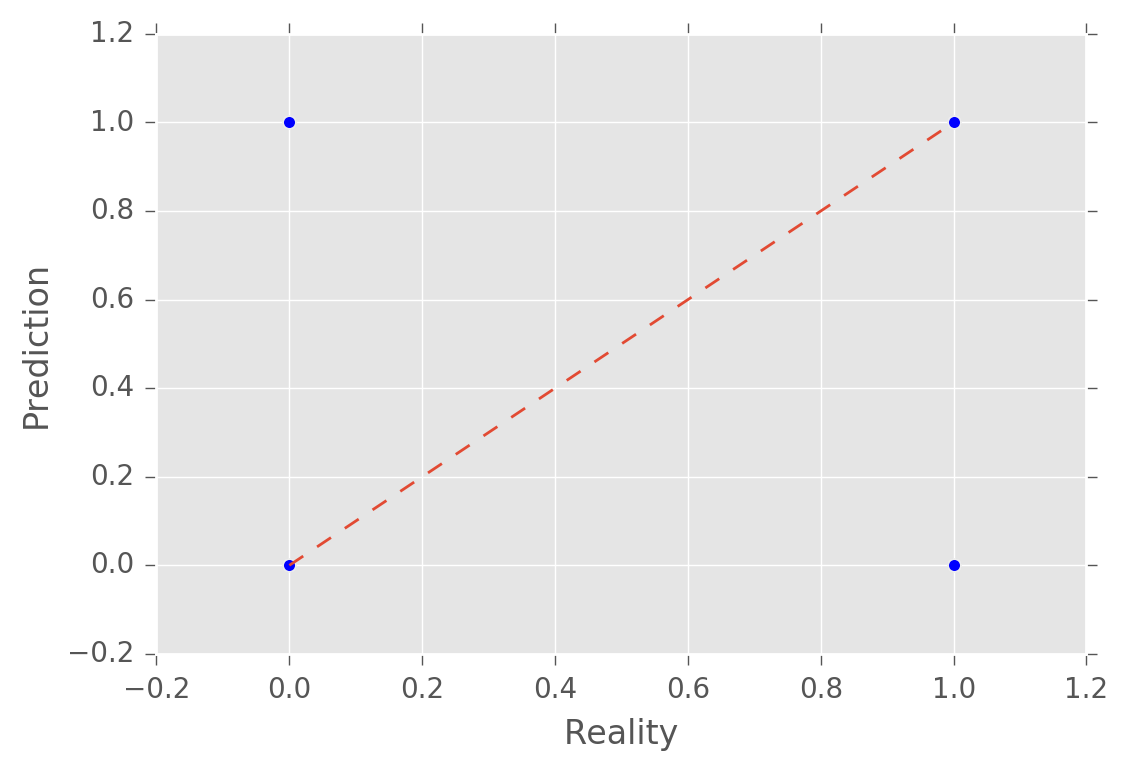

In [442]:
accuracy_report(yval, logistic.predict(Xval))

In [445]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import classification_report

In [446]:
logit_roc_auc = roc_auc_score(yval, logistic.predict(Xval))

In [447]:
print(logit_roc_auc)

0.666666666667


In [449]:
prprint(classification_report(yval, logistic.predict(Xval)))

             precision    recall  f1-score   support

        0.0       0.69      0.83      0.75        42
        1.0       0.70      0.50      0.58        32

avg / total       0.69      0.69      0.68        74



In [450]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [460]:
# обучение модели
rf = RFC(n_estimators=100) # количество деревьев = 15
rf.fit(X=Xtr, y=ytr) # целевая переменная – в первом столбце


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [461]:
# предсказания

test_classes = rf.predict(Xval) # номера классов
test_probs = rf.predict_proba(Xval) # вероятности принадлежности

In [462]:
print (roc_auc_score(yval, test_classes))

0.526041666667


In [465]:
from sklearn.svm import LinearSVC

In [469]:
svc = LinearSVC(C=1.0)

In [472]:
svc.fit(Xtr, ytr)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [473]:
roc_auc_score(yval, svc.predict(Xval))

0.65104166666666674

## According to receicer operating characteristic logistic regression has the best explanatory power